# Inicio

## Libs

In [5]:
import os, sys

import pandas as pd
import numpy as np
from IPython.display import display, HTML

#Visualization
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

import seaborn as sns 
import plotly
import plotly.express as px

# EDA
import sweetviz as sv

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# ambiente virtual
env_path = sys.prefix
env_name = os.path.basename(env_path)
print(f'O nome do ambiente virtual é: {env_name}')
print('Versao Python:', sys.version)
print('Versao Pandas:', pd.__version__)
print('Versao Matplotlib:', matplotlib.__version__)
print('Versao SweetViz:', sv.__version__)

O nome do ambiente virtual é: botcamp
Versao Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Versao Pandas: 2.0.3
Versao Matplotlib: 3.7.2
Versao SweetViz: 2.3.1


## Parametros

In [304]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Ajustar a largura para 100% ou qualquer outro valor
display(HTML("<style>.container { width:75% !important; }</style>"))

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

random_state = 123
vlr_salario_minimo = 1412

In [8]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#print(color.BOLD + 'Hello World !' + color.END)

# Funcoes

## Checar dataframe

In [9]:
def checar_df(df):
    print(color.BOLD  + color.RED + 'Informações do dataframe: ' + color.END)
    df.info(verbose=True, show_counts=True)
    
    print(color.BOLD + color.RED + "\nNúmero de observacoes na base de dados: " + color.END, df.shape[0])
    print('Total de ', df.shape[1], 'Colunas: ', df.columns.values.tolist())
    
    print(color.BOLD + color.RED + "\nNúmero de valores unicos (Não inclui NaN): " + color.END)
    display(df.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())
    
    print(color.BOLD + color.RED + "Número de valores nulos:" + color.END)
    display(df.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

## Criar campo Faixa de Renda

In [337]:
def define_cod_faixa_renda(x):
    '''
    PBZ: pobreza
    BRD: baixa renda
    ASM: acima de 1/2 salario mínimo
    '''
    meio_sm = vlr_salario_minimo/2
    
    if x >=0 and x <= 218.00: return 'PBZ'
    elif x > 218.00 and x <= meio_sm: return 'BRD'
    elif x > meio_sm: return 'ASM'
    else: return 'não informado'

In [164]:
def define_nom_faixa_renda(x):
    '''
    PBZ: pobreza
    BRD: baixa renda
    ASM: acima de 1/2 salario mínimo
    '''
    meio_sm = vlr_salario_minimo/2
    
    if x >=0 and x <= 218.00: return 'Pobreza'
    elif x > 218.00 and x <= meio_sm: return 'Baixa Renda'
    elif x > meio_sm: return 'Acima de 1/2 salário mínimo'
    else: return 'não informado'

# Captura dados - familias

## Ler csv

In [355]:
%%time

list_col_string = ['cd_ibge', 'dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia',
                   'dat_atual_fam','cod_local_domic_fam', 'cod_especie_domic_fam', 
                   'cod_material_piso_fam', 'cod_material_domic_fam', 'cod_agua_canalizada_fam',
                   'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
                   'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
                   'cod_familia_indigena_fam','ind_familia_quilombola_fam',
                   'nom_estab_assist_saude_fam', 'cod_eas_fam', 'nom_centro_assist_fam', 'cod_centro_assist_fam',
                   'ind_parc_mds_fam','estrato', 'classf','marc_pbf'
                  ]
dict_dtype01 = {column: 'str' for column in list_col_string}

# Adicionar outras variaveis
#dict_dtype01['vlr_renda_media_fam'] = 'float64'
#dict_dtype01['qtd_comodos_domic_fam'] = 'int64'
#dict_dtype01['qtd_comodos_dormitorio_fam'] = 'int64'
#dict_dtype01['peso.fam'] = 'int64'
#dict_dtype01['id_familia'] = 'int64'
#dict_dtype01['qtd_pessoas'] = 'int64'
#dict_dtype01

df_fam = pd.read_csv('./dados/base_amostra_familia_201812.csv', sep=';', 
                     #dtype=dict_dtype01, 
                     dtype=str,
                     low_memory=False)

CPU times: total: 16.4 s
Wall time: 18.4 s


In [356]:
#df_fam_copy = df_fam.copy()

In [357]:
#df_fam = df_fam_copy.copy()
df_fam.shape

(4807996, 31)

## Checar dataframe

In [341]:
checar_df(df_fam)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807996 entries, 0 to 4807995
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   cd_ibge                        4807996 non-null  object
 1   estrato                        4807996 non-null  object
 2   classf                         4807996 non-null  object
 3   id_familia                     4807996 non-null  object
 4   dat_cadastramento_fam          4807995 non-null  object
 5   dat_alteracao_fam              4807996 non-null  object
 6   vlr_renda_media_fam            4807858 non-null  object
 7   dat_atualizacao_familia        4807996 non-null  object
 8   cod_local_domic_fam            4787269 non-null  object
 9   cod_especie_domic_fam          4787266 non-null  object
 10  qtd_comodos_domic_fam          4583970 non-null  object
 11  qtd_comodos_dormitorio_fam     4584998 non-null  object
 12  c

,Contagem Unicos
cd_ibge,5534
classf,3
cod_abaste_agua_domic_fam,4
cod_agua_canalizada_fam,2
cod_banheiro_domic_fam,2
cod_calcamento_domic_fam,3
cod_centro_assist_fam,5639
cod_destino_lixo_domic_fam,6
cod_eas_fam,27005
cod_escoa_sanitario_domic_fam,6


Número de valores nulos:


,Contagem Nulos
cd_ibge,0
classf,0
cod_abaste_agua_domic_fam,222349
cod_agua_canalizada_fam,222349
cod_banheiro_domic_fam,222349
cod_calcamento_domic_fam,222350
cod_centro_assist_fam,3031030
cod_destino_lixo_domic_fam,222349
cod_eas_fam,2441370
cod_escoa_sanitario_domic_fam,494595


# Tratamento dados

## Checar valores null

In [358]:
print('\nQuantidade/ Percentual de campos Nulos:')

total = df_fam.isnull().sum().sort_values(ascending=False)
percent = (df_fam.isnull().sum()/df_fam.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]


Quantidade/ Percentual de campos Nulos:


,Total,Percent
cod_centro_assist_fam,3031030,0.6304
nom_centro_assist_fam,3031030,0.6304
nom_estab_assist_saude_fam,2441370,0.5078
cod_eas_fam,2441370,0.5078
cod_escoa_sanitario_domic_fam,494595,0.1029
qtd_comodos_domic_fam,224026,0.0466
qtd_comodos_dormitorio_fam,222998,0.0464
cod_calcamento_domic_fam,222350,0.0462
cod_material_domic_fam,222349,0.0462
cod_iluminacao_domic_fam,222349,0.0462


### Eliminar colunas irrelevantes / com muitos nulos

- cod_eas_fam e nom_estab_assist_saude_fam: mais 50% nulos
- cod_centro_assist_fam e nom_centro_assist_fam: mais 60% nulos
- peso.fam
- marc_pbf

In [359]:
col = ['cod_centro_assist_fam', 'nom_centro_assist_fam', 
       'cod_eas_fam', 'nom_estab_assist_saude_fam', 
       'peso.fam', 'marc_pbf']
for c in col: del df_fam[c]

### Eliminar registros que não possuem informação da renda familiar

In [360]:
tot_reg_df = df_fam.shape[0]
tot_reg_sem_renda = df_fam[df_fam['vlr_renda_media_fam'].isna()].shape[0]

print('Total de registros df:', tot_reg_df)
print('Total de registros (sem info da renda familiar):', tot_reg_sem_renda)

df_fam = df_fam.dropna(subset=['vlr_renda_media_fam'])
print('Total de registros df - após exclusão:', df_fam.shape[0])

Total de registros df: 4807996
Total de registros (sem info da renda familiar): 138
Total de registros df - após exclusão: 4807858


### Eliminar registros com algum campo null

In [96]:
#para verificar campos NAN
#df_fam['cod_escoa_sanitario_domic_fam'].value_counts(dropna=False)

In [361]:
df_fam = df_fam.dropna()
print('Total de registros df - após exclusão demais registros:', df_fam.shape[0])
print(f'\n{df_fam.shape[1]} Colunas:\n {df_fam.columns.values}')

Total de registros df - após exclusão demais registros: 4158022

25 Colunas:
 ['cd_ibge' 'estrato' 'classf' 'id_familia' 'dat_cadastramento_fam'
 'dat_alteracao_fam' 'vlr_renda_media_fam' 'dat_atualizacao_familia'
 'cod_local_domic_fam' 'cod_especie_domic_fam' 'qtd_comodos_domic_fam'
 'qtd_comodos_dormitorio_fam' 'cod_material_piso_fam'
 'cod_material_domic_fam' 'cod_agua_canalizada_fam'
 'cod_abaste_agua_domic_fam' 'cod_banheiro_domic_fam'
 'cod_escoa_sanitario_domic_fam' 'cod_destino_lixo_domic_fam'
 'cod_iluminacao_domic_fam' 'cod_calcamento_domic_fam'
 'cod_familia_indigena_fam' 'ind_familia_quilombola_fam'
 'ind_parc_mds_fam' 'qtde_pessoas']


### Eliminar registros com notação cientifica

In [362]:
# Foram identificados na base de dados valores em notaçao cientifica
df_fam[df_fam['id_familia'].str.contains('e\+', na=False)]

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas
83055,1100114,2,3,1e+05,2017-10-09,2018-10-01,1500,2017-10-09,1,1,3,1,5,1,1,1,1,3,1,1,1,2,2,0,1
168331,2804508,2,3,2e+05,2005-07-05,2018-09-30,10,2017-01-31,1,1,5,3,1,1,1,1,1,2,1,1,3,2,2,0,5
253773,5007307,1,3,3e+05,2016-03-15,2016-03-15,880,2016-03-15,1,1,5,1,5,1,1,1,1,2,1,1,3,2,2,0,1
340186,1715101,1,3,4e+05,2013-02-15,2018-10-01,0,2017-01-20,2,1,4,2,1,2,1,3,1,3,3,1,3,2,2,0,4
429769,2302800,2,3,5e+05,2003-03-13,2018-09-30,191,2017-04-25,2,1,6,4,2,1,2,4,1,3,3,1,3,2,2,205,5
775603,4321501,1,3,9e+05,2010-06-14,2018-12-05,954,2018-12-05,1,1,5,3,5,1,1,1,1,3,1,2,1,2,2,0,1
864534,4104907,2,3,1e+06,2016-06-10,2018-10-10,100,2018-10-10,2,1,4,2,5,1,1,2,1,3,3,1,3,2,2,0,2
2640481,3522208,2,2,3e+06,2010-02-25,2018-09-30,500,2018-09-04,1,1,5,1,5,2,1,1,1,1,1,3,1,2,2,0,1
3559340,1721000,2,1,4e+06,2018-01-19,2018-10-01,468,2018-01-19,1,1,8,4,5,1,1,1,1,2,2,2,2,2,2,0,2
4524305,3304557,2,1,5e+06,2018-09-20,2018-10-02,954,2018-09-20,1,1,4,1,5,1,1,1,1,1,2,1,2,2,2,0,1


In [363]:
# Remoção de tais registros
df_fam = df_fam[~df_fam['id_familia'].str.contains('e\+', na=False)]
print('Total de registros df - após exclusão registros:', df_fam.shape[0])
print(f'\n{df_fam.shape[1]} Colunas:\n {df_fam.columns.values}')

Total de registros df - após exclusão registros: 4158012

25 Colunas:
 ['cd_ibge' 'estrato' 'classf' 'id_familia' 'dat_cadastramento_fam'
 'dat_alteracao_fam' 'vlr_renda_media_fam' 'dat_atualizacao_familia'
 'cod_local_domic_fam' 'cod_especie_domic_fam' 'qtd_comodos_domic_fam'
 'qtd_comodos_dormitorio_fam' 'cod_material_piso_fam'
 'cod_material_domic_fam' 'cod_agua_canalizada_fam'
 'cod_abaste_agua_domic_fam' 'cod_banheiro_domic_fam'
 'cod_escoa_sanitario_domic_fam' 'cod_destino_lixo_domic_fam'
 'cod_iluminacao_domic_fam' 'cod_calcamento_domic_fam'
 'cod_familia_indigena_fam' 'ind_familia_quilombola_fam'
 'ind_parc_mds_fam' 'qtde_pessoas']


## Eliminar colunas com apenas 1 valor (apos analise sweetviz)

In [325]:
#df_fam_copy['cod_especie_domic_fam'].value_counts(normalize=True)
#df_fam_copy['cod_banheiro_domic_fam'].value_counts(normalize=True)
#df_fam_copy['cod_familia_indigena_fam'].value_counts(normalize=True)

cod_familia_indigena_fam
2   0.9948
1   0.0052
Name: proportion, dtype: float64

In [364]:
df_fam['cod_especie_domic_fam'].value_counts()

cod_especie_domic_fam
1    4158012
Name: count, dtype: int64

In [365]:
df_fam['cod_banheiro_domic_fam'].value_counts()

cod_banheiro_domic_fam
1    4158012
Name: count, dtype: int64

In [366]:
df_fam['cod_familia_indigena_fam'].value_counts()

cod_familia_indigena_fam
2    4158012
Name: count, dtype: int64

In [367]:
del df_fam['cod_especie_domic_fam']
del df_fam['cod_banheiro_domic_fam']
del df_fam['cod_familia_indigena_fam']

## Formatar campos numericos (int)

In [368]:
# lista da colunas que se iniciam com cod_
colunas_cod = [col for col in df_fam.columns if col.startswith('cod_')]
print(colunas_cod)

['cod_local_domic_fam', 'cod_material_piso_fam', 'cod_material_domic_fam', 'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam', 'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam']


In [370]:
# criar lista das colunas numericas 
col_num = [#'estrato', 'classf', 'id_familia',
           'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam', 'qtde_pessoas',
           #'ind_familia_quilombola_fam', 'ind_parc_mds_fam'
] 
for c in col_num:
    df_fam[c] = df_fam[c].astype('int')

## Formatar campos float

In [371]:
col_float = ['vlr_renda_media_fam']
for c in col_float:
    df_fam[c] = df_fam[c].astype('float')

## Formatar campos data

In [372]:
col_dates = ['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia']
for c in col_dates:
    df_fam[c] = pd.to_datetime(df_fam[c], errors='coerce')

## Checar df final

In [151]:
#df_fam.info(verbose=True, show_counts=True)

In [373]:
checar_df(df_fam)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
Index: 4158012 entries, 0 to 4807995
Data columns (total 22 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   cd_ibge                        4158012 non-null  object        
 1   estrato                        4158012 non-null  object        
 2   classf                         4158012 non-null  object        
 3   id_familia                     4158012 non-null  object        
 4   dat_cadastramento_fam          4158012 non-null  datetime64[ns]
 5   dat_alteracao_fam              4158012 non-null  datetime64[ns]
 6   vlr_renda_media_fam            4158012 non-null  float64       
 7   dat_atualizacao_familia        4158012 non-null  datetime64[ns]
 8   cod_local_domic_fam            4158012 non-null  object        
 9   qtd_comodos_domic_fam          4158012 non-null  int32         
 10  qtd_comodos_dormitorio_fam     4

,Contagem Unicos
cd_ibge,5534
classf,3
cod_abaste_agua_domic_fam,4
cod_agua_canalizada_fam,2
cod_calcamento_domic_fam,3
cod_destino_lixo_domic_fam,6
cod_escoa_sanitario_domic_fam,6
cod_iluminacao_domic_fam,6
cod_local_domic_fam,2
cod_material_domic_fam,8


Número de valores nulos:


,Contagem Nulos
cd_ibge,0
classf,0
cod_abaste_agua_domic_fam,0
cod_agua_canalizada_fam,0
cod_calcamento_domic_fam,0
cod_destino_lixo_domic_fam,0
cod_escoa_sanitario_domic_fam,0
cod_iluminacao_domic_fam,0
cod_local_domic_fam,0
cod_material_domic_fam,0


# Enriquecimento dos dados

## Criar campo - Faixa renda

In [374]:
df_fam['cod_faixa_renda'] = df_fam['vlr_renda_media_fam'].apply(lambda x: define_cod_faixa_renda(x))
df_fam['nom_faixa_renda'] = df_fam['vlr_renda_media_fam'].apply(lambda x: define_nom_faixa_renda(x))

In [375]:
# checar 
col = ['vlr_renda_media_fam', 'cod_faixa_renda', 'nom_faixa_renda']
df_fam[col].sample(10)

,vlr_renda_media_fam,cod_faixa_renda,nom_faixa_renda
283290,0.0000,PBZ,Pobreza
488590,77.0000,PBZ,Pobreza
506181,503.0000,BRD,Baixa Renda
3062706,954.0000,ASM,Acima de 1/2 salário mínimo
4586185,0.0000,PBZ,Pobreza
2529224,954.0000,ASM,Acima de 1/2 salário mínimo
2556987,58.0000,PBZ,Pobreza
889858,293.0000,BRD,Baixa Renda
2277139,10.0000,PBZ,Pobreza
2087505,50.0000,PBZ,Pobreza


### Proporção de cada faixa de renda

In [376]:
t1 = df_fam['nom_faixa_renda'].value_counts()
t2 = df_fam['nom_faixa_renda'].value_counts(normalize=True)
t = pd.concat([t1, t2], axis=1).reset_index()
display(t.sort_values(by=['proportion'], ascending=False))

,nom_faixa_renda,count,proportion
0,Pobreza,2500566,0.6014
1,Baixa Renda,1015707,0.2443
2,Acima de 1/2 salário mínimo,641739,0.1543


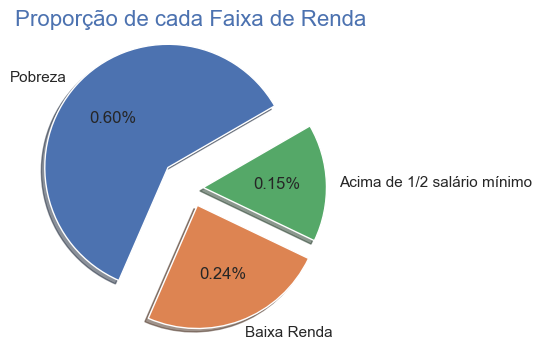

In [377]:
fig = plt.figure(figsize =(8, 4))

temp = t.sort_values(by=['proportion'], ascending=False)
labels = temp['nom_faixa_renda'].values
data = temp['count'].values

fracs = temp['proportion'].values
total = sum(fracs)
explode = (0.25, 0.15, 0.1)

plt.title("Proporção de cada Faixa de Renda", fontsize=16, loc = 'center', color='b')
plt.pie(fracs, 
        explode=explode, 
        labels=labels,
        autopct=lambda p: '{:.2f}%'.format(p * total / 100),
        shadow=True, 
        startangle=30)
plt.show()

### Histograma de valores das rendas médias das familias

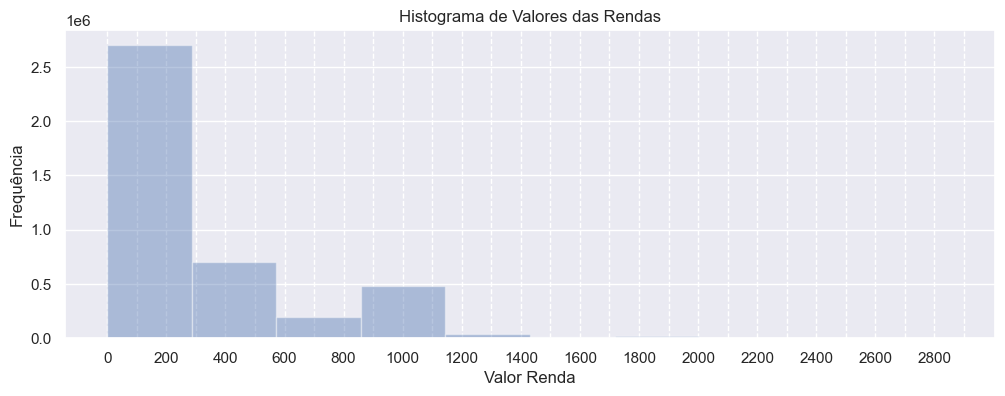

In [378]:
f, axes = plt.subplots(1,1,figsize=(12,4))
sns.distplot(df_fam['vlr_renda_media_fam'],
             hist=True, 
             kde=False,  
             bins=10,
             ax=axes)

major_ticks = np.arange(0, 3000, 200)  # Ticks maiores a cada 2 unidades
minor_ticks = np.arange(0, 3000, 100)  # Ticks menores a cada 1 unidade

# Definir os major ticks e minor ticks
plt.xticks(major_ticks)  
plt.gca().set_xticks(minor_ticks, minor=True)  
plt.grid(which='both', axis='x', linestyle='--')

plt.title('Histograma de Valores das Rendas')
plt.xlabel('Valor Renda')
plt.ylabel('Frequência')

plt.show()

### Intervalo de valores das rendas médias das familias

In [379]:
df_fam['vlr_renda_media_fam'].describe()

count   4158012.0000
mean        289.5871
std         352.7314
min           0.0000
25%          40.0000
50%         125.0000
75%         463.0000
max        2862.0000
Name: vlr_renda_media_fam, dtype: float64

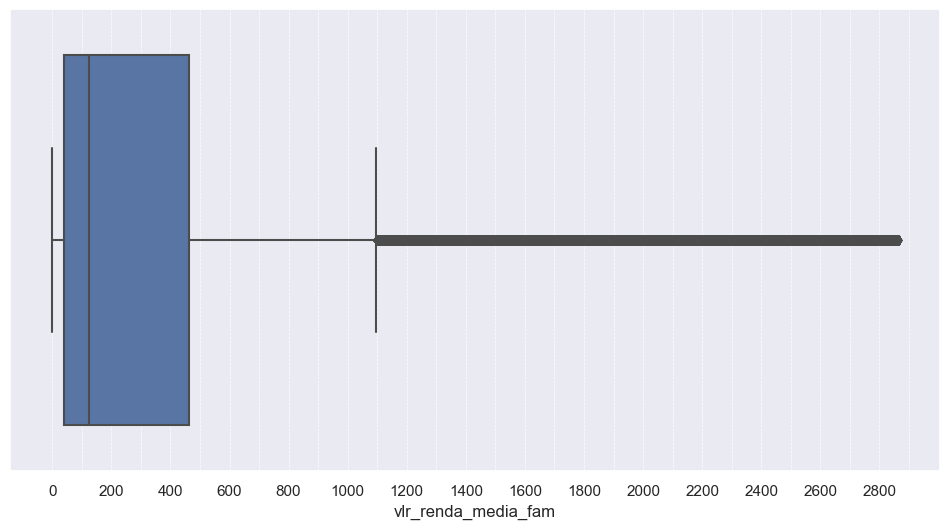

In [380]:
f, axes = plt.subplots(1, 1, figsize=(12, 6))
major_ticks = np.arange(0, 3000, 200)
minor_ticks = np.arange(0, 3000, 100)
sns.boxplot(x=df_fam['vlr_renda_media_fam'], ax=axes, orient='h')

axes.set_xticks(major_ticks)
axes.set_xticks(minor_ticks, minor=True)
axes.grid(which='both', axis='x', linestyle='--', linewidth=0.5)  

#axes.tick_params(which='major', length=10, width=2, color='red')  
#axes.tick_params(which='minor', length=5, width=1, color='blue')  
plt.show()

## Tempo decorrido após última atualização do cadastro

In [381]:
colunas_dat = [col for col in df_fam.columns if col.startswith('dat')]
colunas_dat

['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia']

In [382]:
# Definir a data de referência
data_referencia = pd.to_datetime('2024-01-01')

df_fam['dias_decorridos'] = (data_referencia - df_fam['dat_atualizacao_familia']).dt.days
df_fam['meses_decorridos'] = df_fam['dias_decorridos']/30
df_fam['anos_decorridos'] = df_fam['dias_decorridos']/365

In [383]:
col = ['dat_cadastramento_fam', 'dat_atualizacao_familia', 'dias_decorridos','meses_decorridos', 'anos_decorridos']
df_fam[col].sample(10)

,dat_cadastramento_fam,dat_atualizacao_familia,dias_decorridos,meses_decorridos,anos_decorridos
4447439,2018-06-01,2018-06-01,2040,68.0000,5.5890
3098906,2004-03-31,2016-10-25,2624,87.4667,7.1890
3836391,2009-12-28,2015-11-05,2979,99.3000,8.1616
1223589,2016-02-29,2018-09-13,1936,64.5333,5.3041
217412,2017-03-03,2017-03-03,2495,83.1667,6.8356
3974944,2018-10-09,2018-10-09,1910,63.6667,5.2329
1757833,2004-06-01,2017-08-14,2331,77.7000,6.3863
3035868,2003-03-19,2017-08-01,2344,78.1333,6.4219
3230294,2008-09-17,2018-11-06,1882,62.7333,5.1562
1130546,2015-08-12,2018-06-27,2014,67.1333,5.5178


<Axes: xlabel='anos_decorridos', ylabel='Density'>

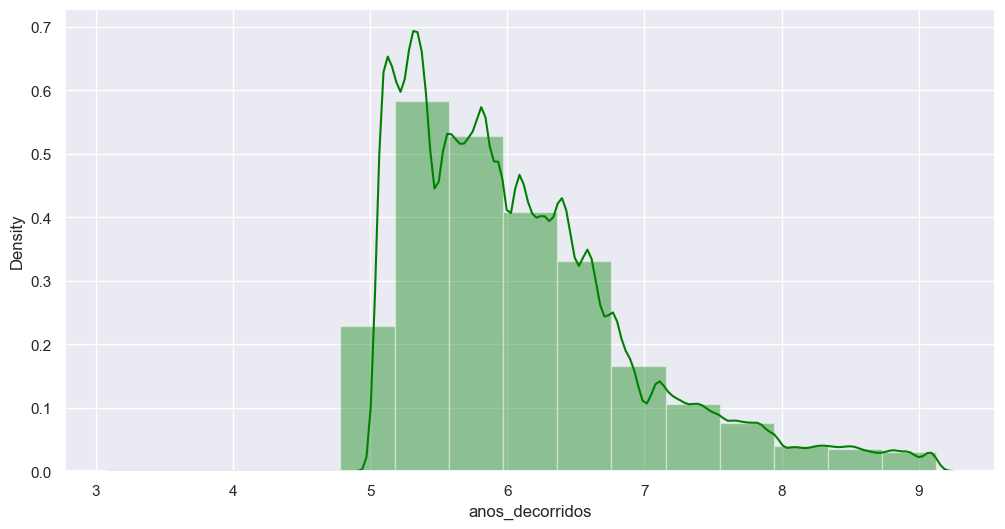

In [266]:
f, ax = plt.subplots(1, figsize=(12,6))
sns.distplot(df_fam['anos_decorridos'], bins=15, ax=ax, kde=True, hist=True, color='green' )

In [384]:
# poucas familias com cadastro atualizado
col=['id_familia', 'dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia',
     'dias_decorridos','meses_decorridos', 'anos_decorridos'    ]
df_fam[df_fam['anos_decorridos']<5][col]

,id_familia,dat_cadastramento_fam,dat_alteracao_fam,dat_atualizacao_familia,dias_decorridos,meses_decorridos,anos_decorridos
316801,374200,2004-07-26,2018-09-30,2020-05-16,1325,44.1667,3.6301
1023876,1184147,2002-08-22,2018-09-30,2019-11-14,1509,50.3000,4.1342
1478488,1704200,2018-10-18,2018-10-18,2019-10-18,1536,51.2000,4.2082
2677848,3041008,2018-04-17,2018-10-19,2020-10-19,1169,38.9667,3.2027


## Generalizar se pertence a um grupo especifico

In [402]:
t1 = df_fam['ind_parc_mds_fam'].value_counts()
t2 = df_fam['ind_parc_mds_fam'].value_counts(normalize=True)
t = pd.concat([t1, t2], axis=1).reset_index()
display(t.sort_values(by=['proportion'], ascending=False))

,ind_parc_mds_fam,count,proportion
0,0,3850426,0.9260
1,205,200223,0.0482
2,202,34598,0.0083
3,301,20085,0.0048
4,306,19782,0.0048
5,204,15575,0.0037
6,303,4310,0.0010
7,201,4244,0.0010
8,305,4237,0.0010
9,304,2055,0.0005


In [403]:
df_fam['ind_grp_espec'] = np.where(df_fam['ind_parc_mds_fam']=='0','Nao','Sim')

t1 = df_fam['ind_grp_espec'].value_counts()
t2 = df_fam['ind_grp_espec'].value_counts(normalize=True)
t = pd.concat([t1, t2], axis=1).reset_index()
display(t.sort_values(by=['proportion'], ascending=False))

,ind_grp_espec,count,proportion
0,Nao,3850426,0.9260
1,Sim,307586,0.0740


## Quilombolas

In [205]:
#df_fam[ (df_fam['ind_grp_espec']=='Sim')]['ind_familia_quilombola_fam'].value_counts()

In [404]:
t1 = df_fam['ind_familia_quilombola_fam'].value_counts()
t2 = df_fam['ind_familia_quilombola_fam'].value_counts(normalize=True)
t = pd.concat([t1, t2], axis=1).reset_index()
display(t.sort_values(by=['proportion'], ascending=False))

,ind_familia_quilombola_fam,count,proportion
0,2,4138076,0.9952
1,1,19936,0.0048


In [405]:
df_fam['ind_grp_espec_quil'] = np.where((df_fam['ind_grp_espec'] == 'Sim') & (df_fam['ind_familia_quilombola_fam'] == '1'), 'Sim', 'Nao')

t1 = df_fam['ind_grp_espec_quil'].value_counts()
t2 = df_fam['ind_grp_espec_quil'].value_counts(normalize=True)
t = pd.concat([t1, t2], axis=1).reset_index()
display(t.sort_values(by=['proportion'], ascending=False))

,ind_grp_espec_quil,count,proportion
0,Nao,4149935,0.9981
1,Sim,8077,0.0019


# Salvar dados

In [388]:
df_fam.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4158012 entries, 0 to 4807995
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   cd_ibge                        4158012 non-null  object        
 1   estrato                        4158012 non-null  object        
 2   classf                         4158012 non-null  object        
 3   id_familia                     4158012 non-null  object        
 4   dat_cadastramento_fam          4158012 non-null  datetime64[ns]
 5   dat_alteracao_fam              4158012 non-null  datetime64[ns]
 6   vlr_renda_media_fam            4158012 non-null  float64       
 7   dat_atualizacao_familia        4158012 non-null  datetime64[ns]
 8   cod_local_domic_fam            4158012 non-null  object        
 9   qtd_comodos_domic_fam          4158012 non-null  int32         
 10  qtd_comodos_dormitorio_fam     4158012 non-null  int32     

In [389]:
%%time
#df_fam.to_csv('./dados/base_amostra_familia_201812_tratado.csv',encoding='UTF-8', sep='|', index=False) 

CPU times: total: 39 s
Wall time: 41.2 s


In [6]:
%%time
dados = sv.analyze(df_fam)

                                             |                            | [  0%]   00:00 -> (? left)


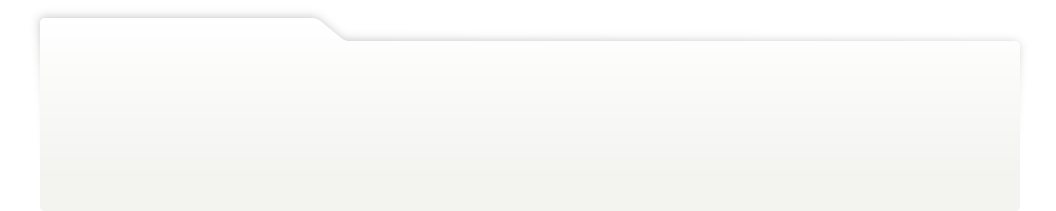
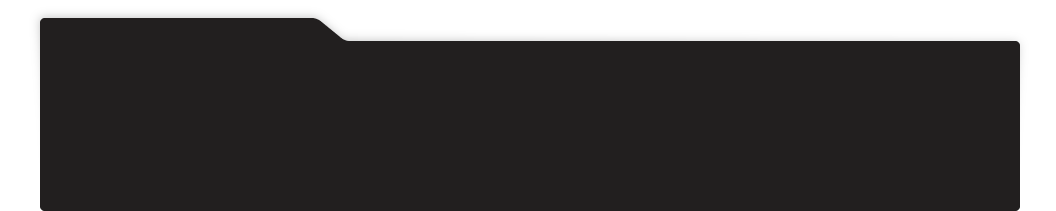
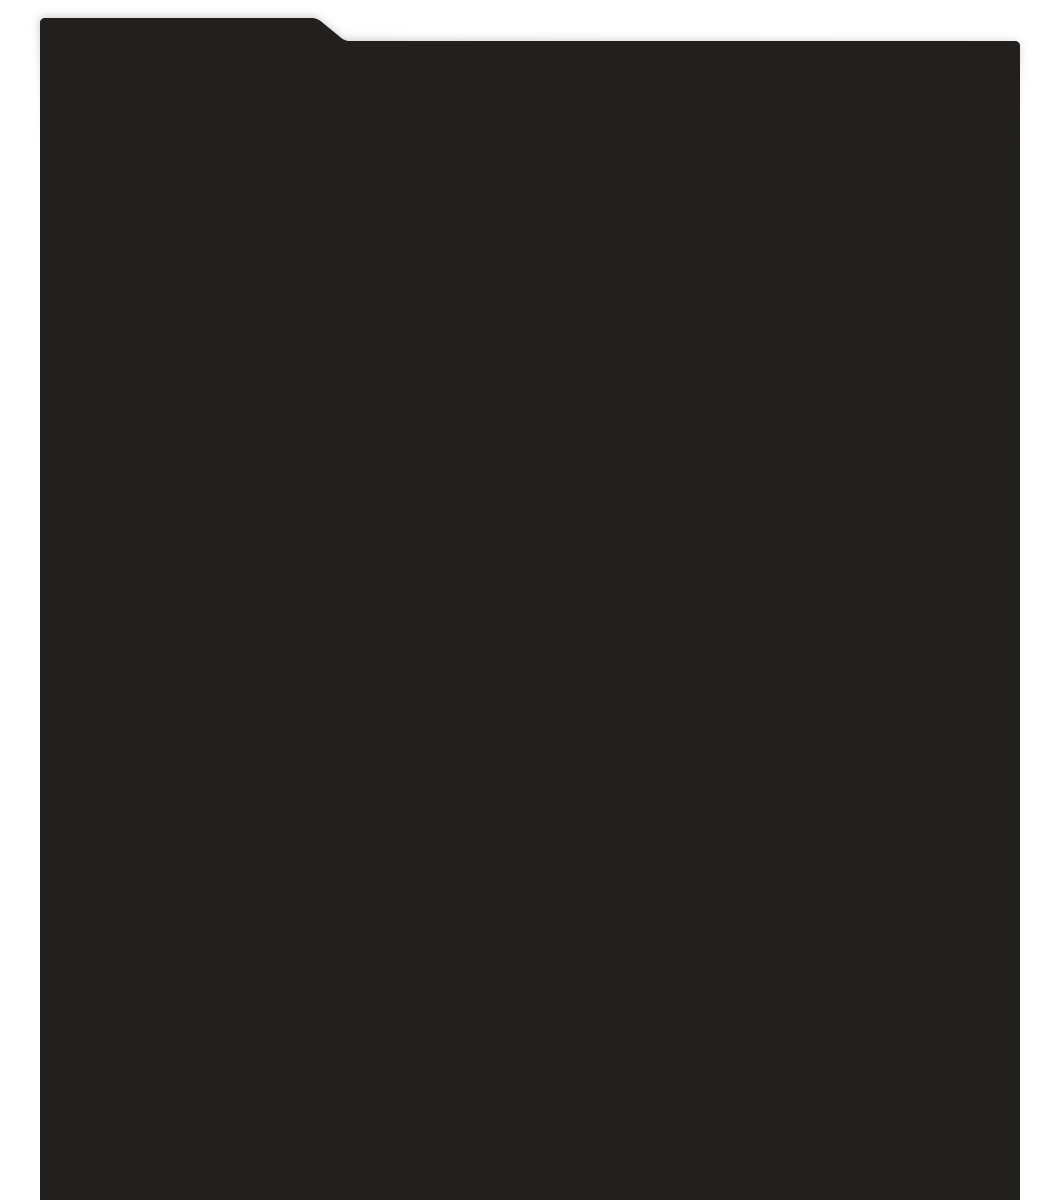
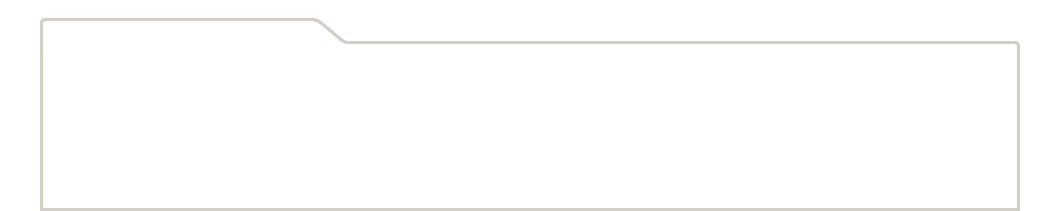
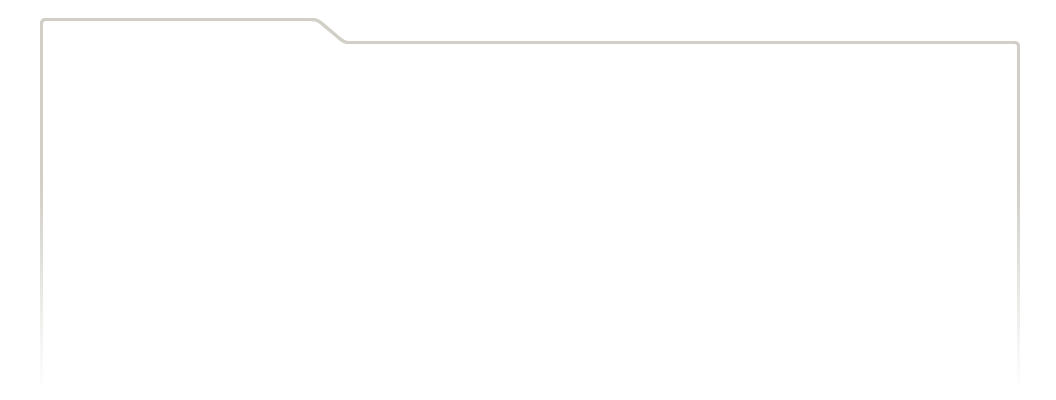
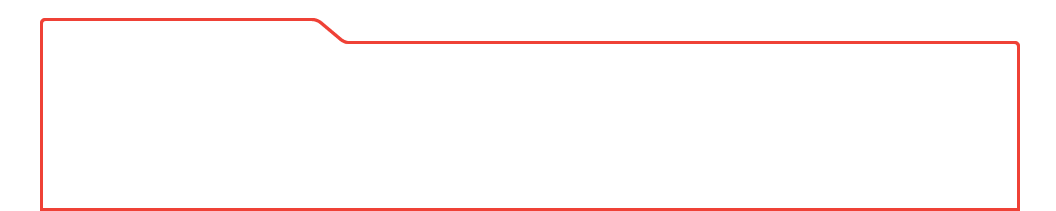
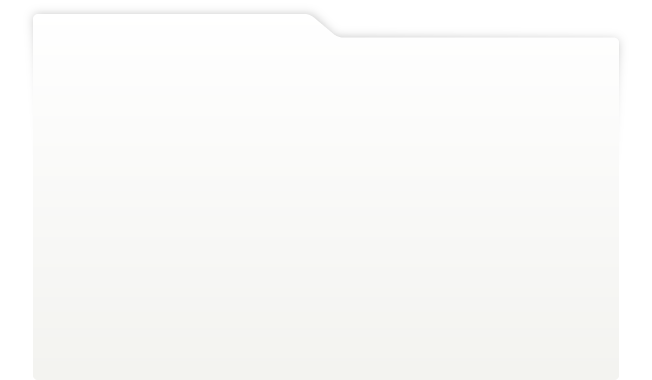
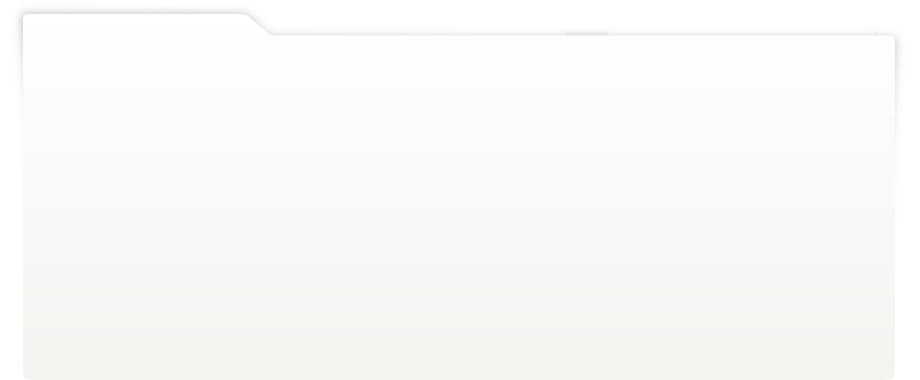
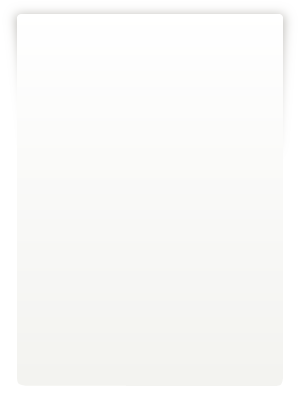
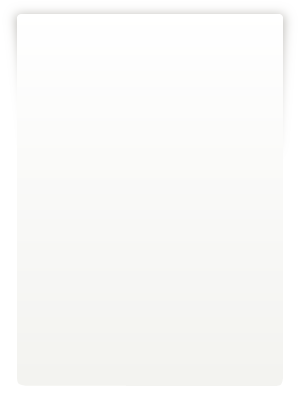
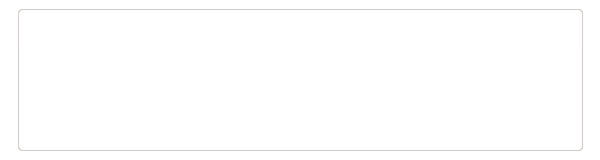
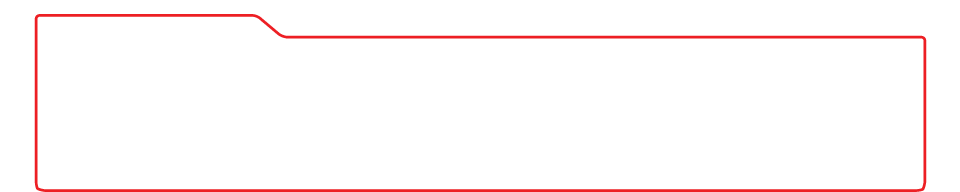
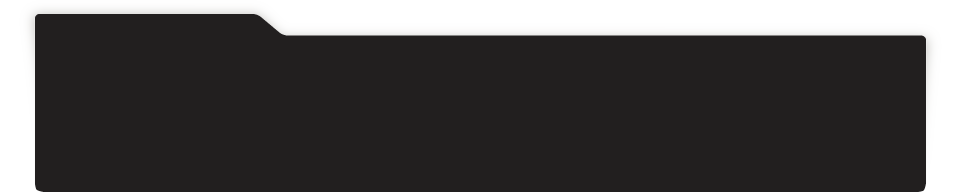
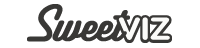
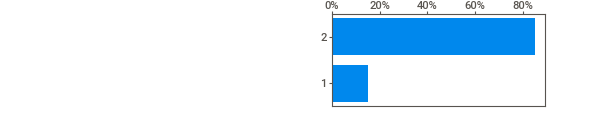
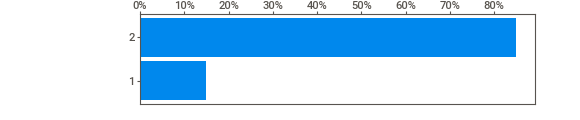
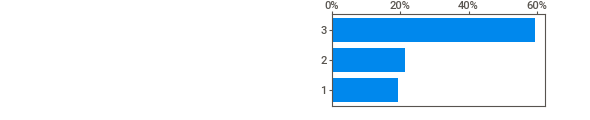
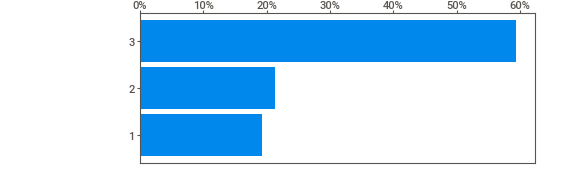
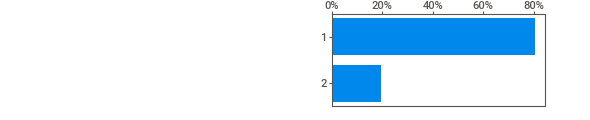
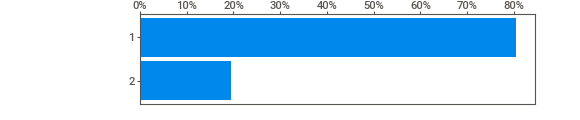
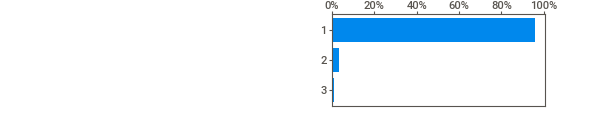
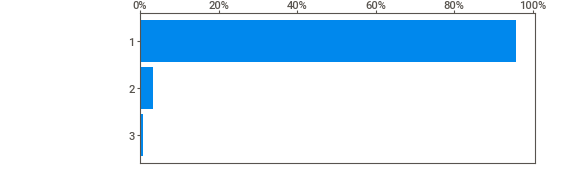
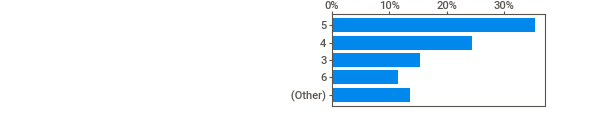
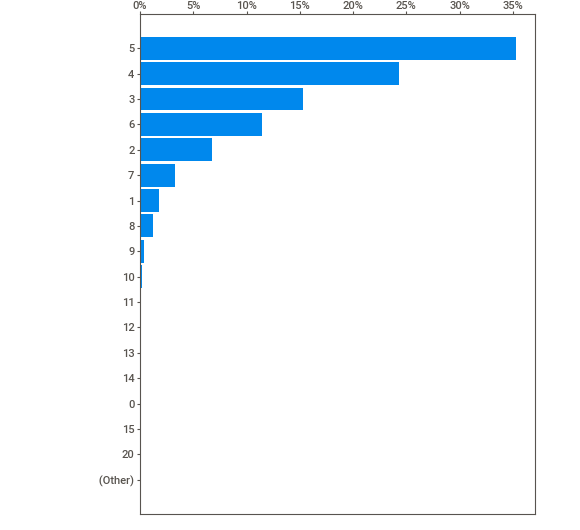
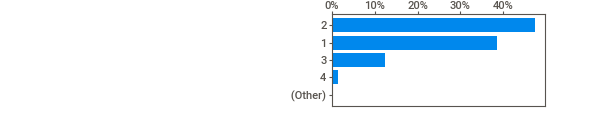
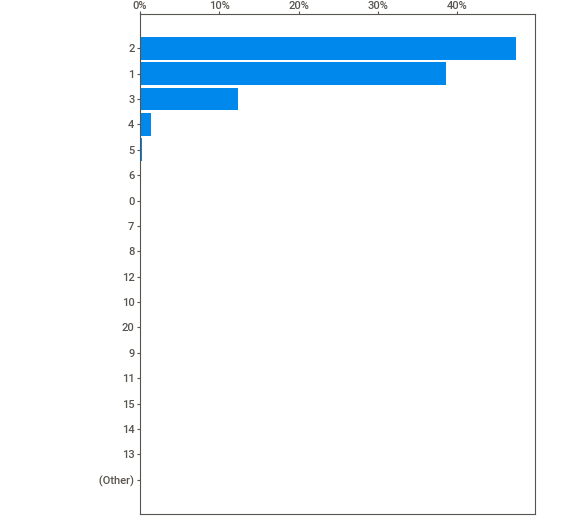
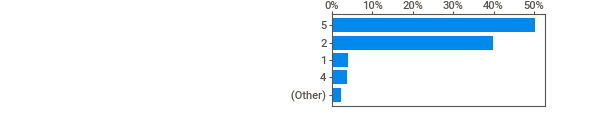
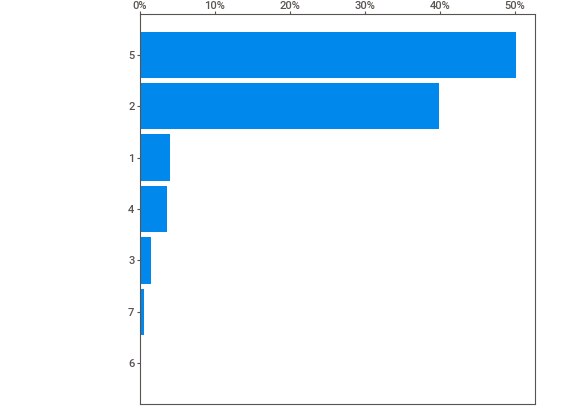
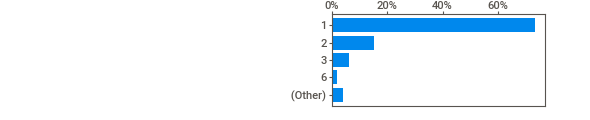
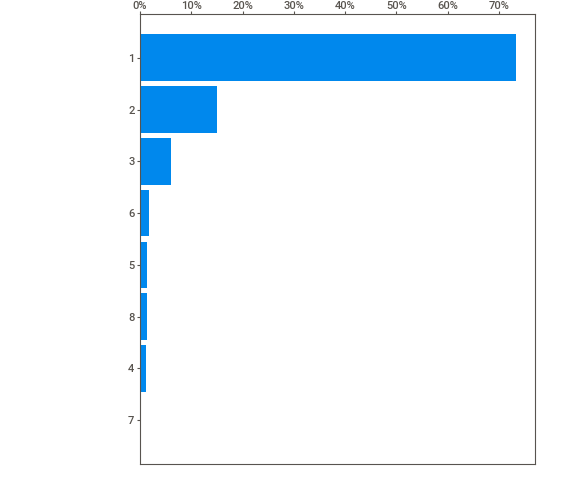
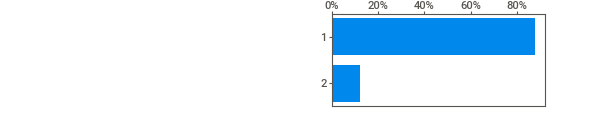
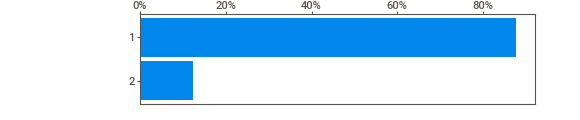
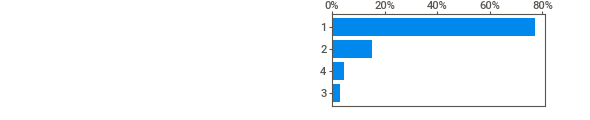
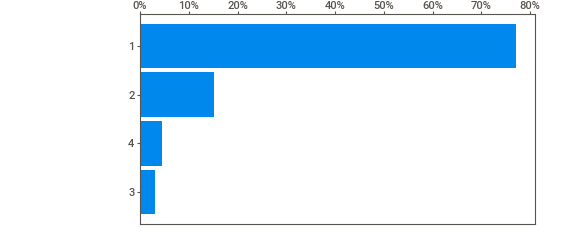
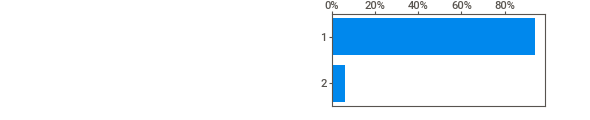
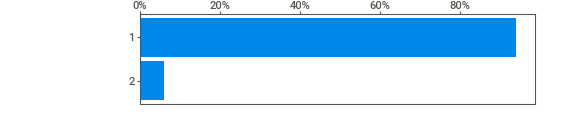
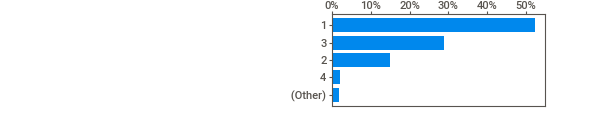
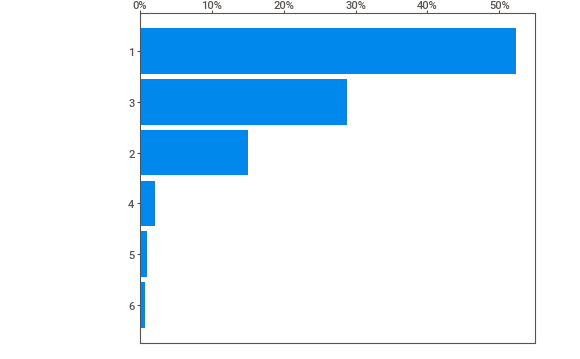
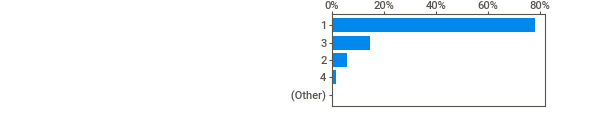
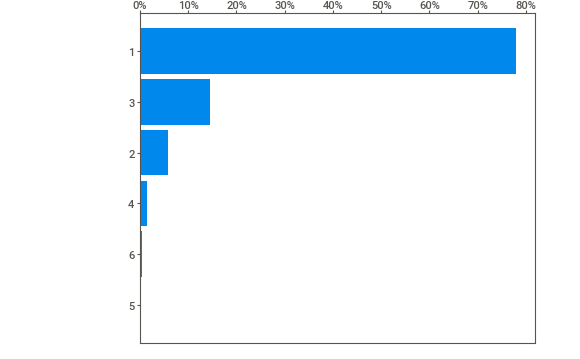
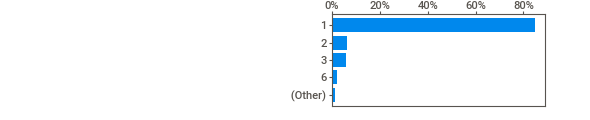
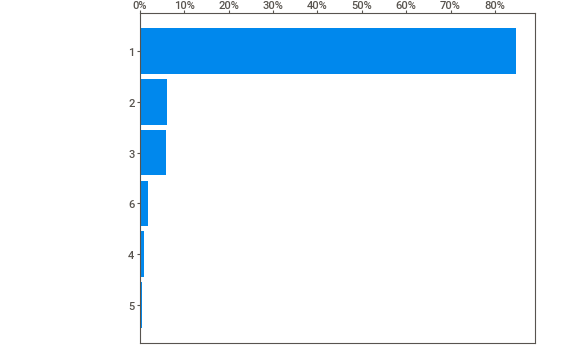
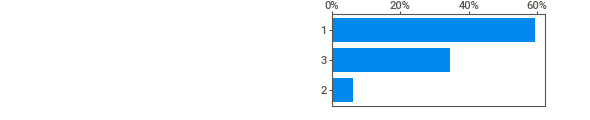
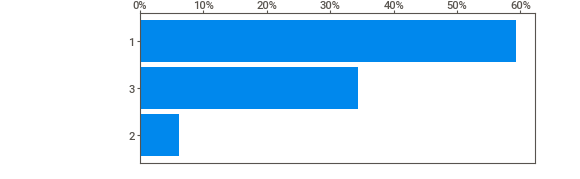
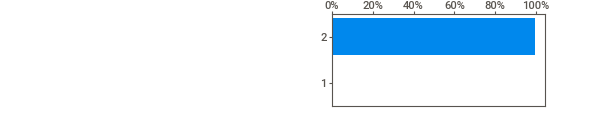
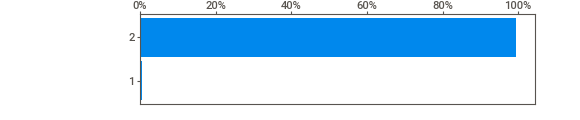
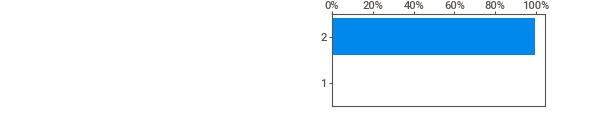
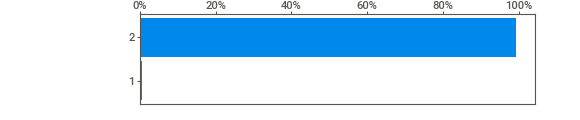
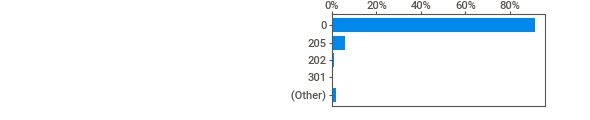
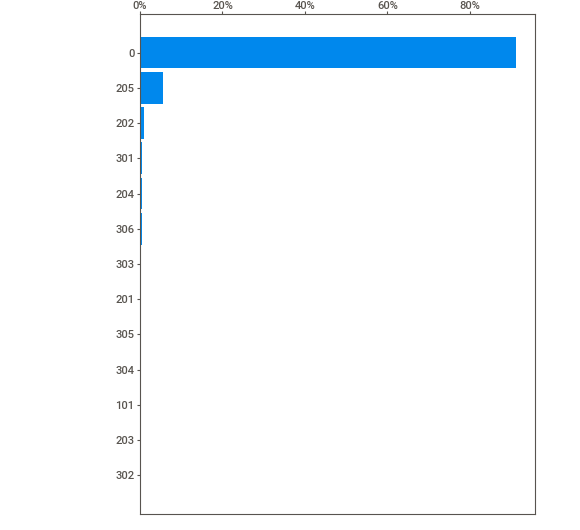
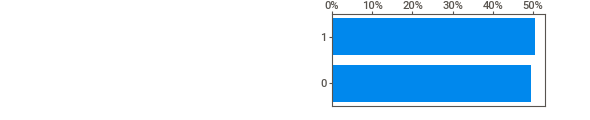
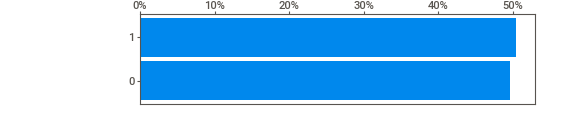
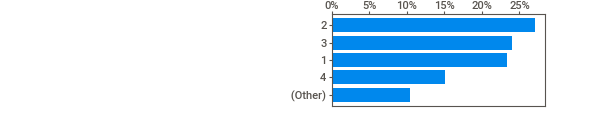
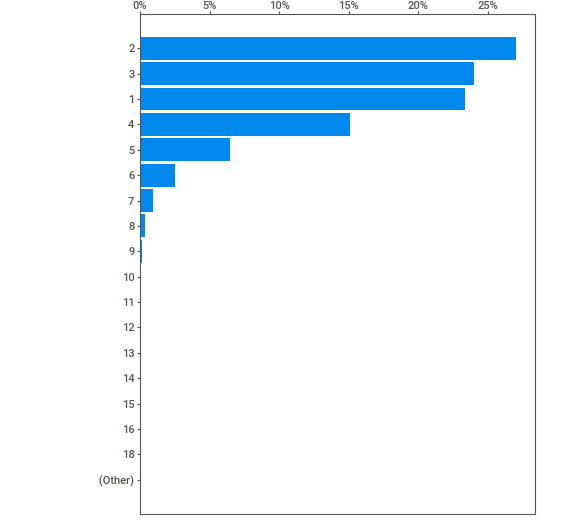
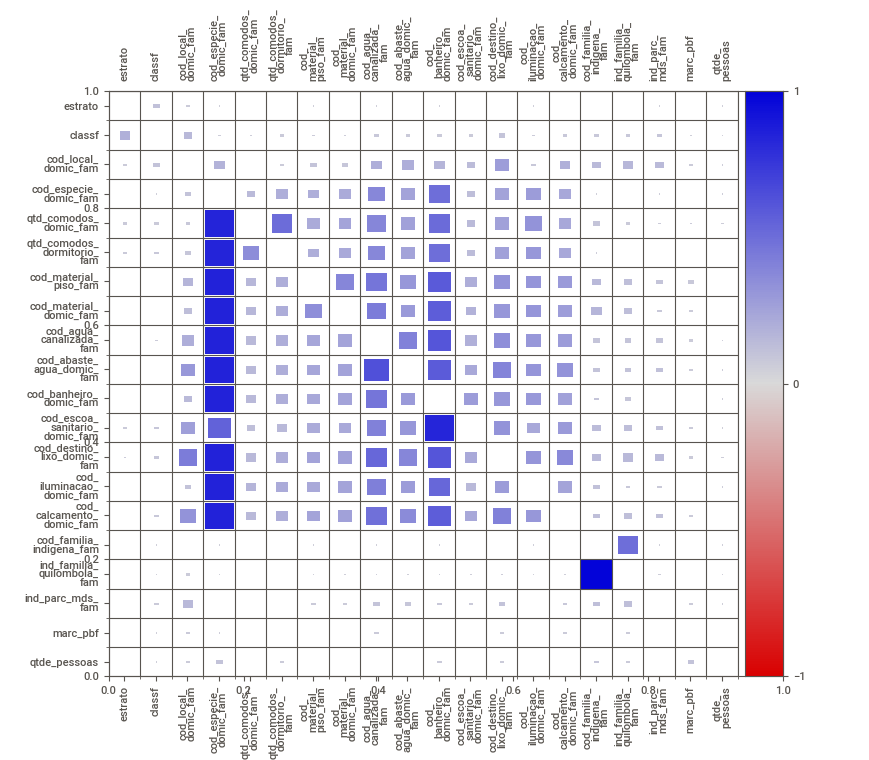
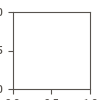

In [7]:
dados.show_notebook()

In [8]:
dados.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Correlações numéricas

## Correlação entre as variáveis independentes

In [417]:
l_col_num = df_fam.select_dtypes(include=['number']).columns.tolist()
l_col_num

['vlr_renda_media_fam',
 'qtd_comodos_domic_fam',
 'qtd_comodos_dormitorio_fam',
 'qtde_pessoas',
 'dias_decorridos',
 'meses_decorridos',
 'anos_decorridos']

In [419]:
%%time
#demorado!!!
sns.pairplot(df_fam, vars=l_col_num, hue='cod_faixa_renda')


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000027AC0FA47C0> (for post_execute):



KeyboardInterrupt



## Correlação variaveis independentes numericas com a target

In [406]:
def corr_spearman(df, lista_col, col_top, k):
    k = k # número de variáveis
    corrmat = abs(df[lista_col].corr(method='spearman')) # correlação de spearman
    cols = corrmat.nlargest(k, col_top).index # o k-ésimo maior valor
    cm = np.corrcoef(df[cols].values.T) # calcula a correlação
    
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(20, 6))
    
    mask = np.zeros_like(cm) 
    mask[np.triu_indices_from(mask)] = True 
    sns.set_style("white")
    hm = sns.heatmap(cm, cbar=True, 
                     annot=True, 
                     square=True, 
                     fmt='.2f',
                     annot_kws={'size': 10}, 
                     yticklabels=cols.values, 
                     xticklabels=cols.values, 
                     mask = mask)
    plt.show()
    return cm, cols, corrmat

In [407]:
l_col_num = df_fam.select_dtypes(include=['number']).columns.tolist()
l_col_num

['vlr_renda_media_fam',
 'qtd_comodos_domic_fam',
 'qtd_comodos_dormitorio_fam',
 'qtde_pessoas',
 'dias_decorridos',
 'meses_decorridos',
 'anos_decorridos']

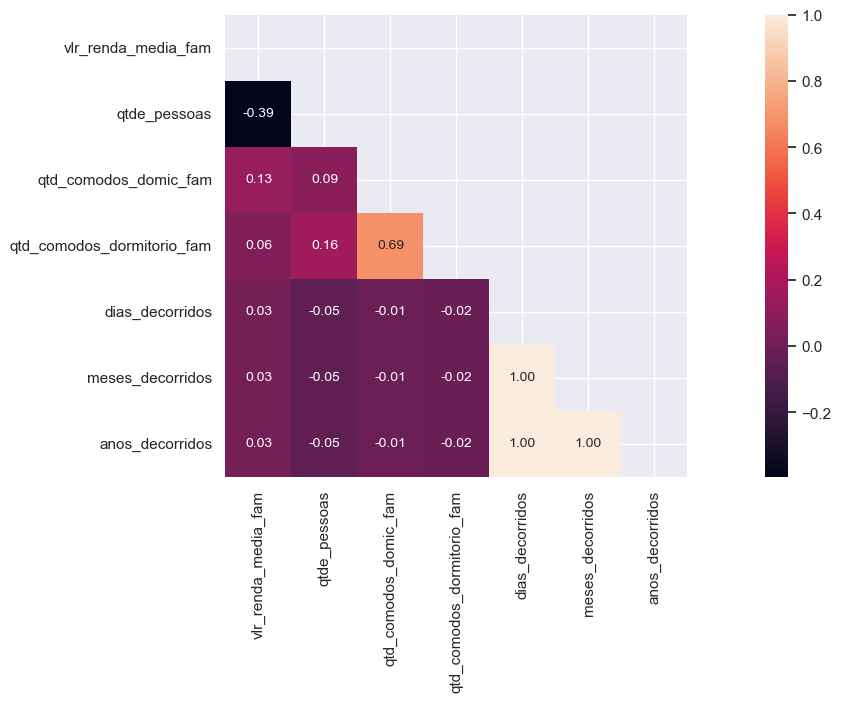

As maiores correlações: 


,Correlação
vlr_renda_media_fam,1.0000


In [408]:
k = 10 # the k largest correlations
col_top = 'vlr_renda_media_fam'
cm, cols, corrmat = corr_spearman(df_fam, l_col_num, col_top, k)

result = pd.DataFrame(cm[0],cols, columns=['Correlação'])
print('As maiores correlações: ')
result[np.abs(result['Correlação'])>0.5].sort_values(by='Correlação', ascending=False)

[Text(0.5, 0, 'Qtd pessoas na familia')]

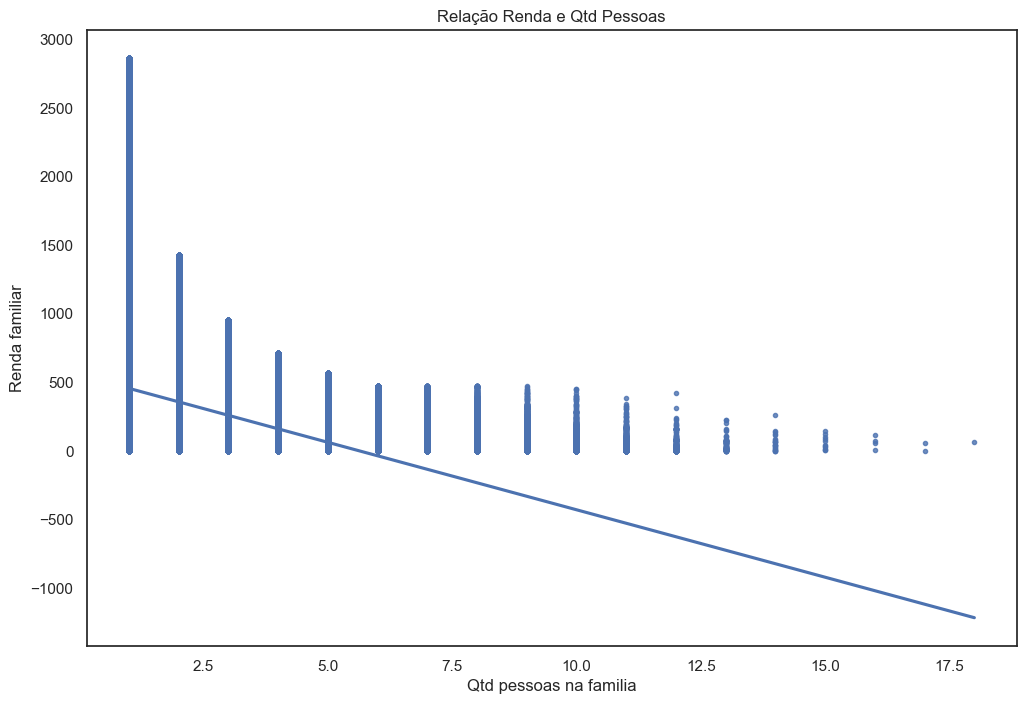

In [416]:
%%time
#demorado!!!
f, axes = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(x='qtde_pessoas', 
            y='vlr_renda_media_fam', 
            data=df_fam, 
            marker='.', 
            ax = axes)
axes.set(title="Relação Renda e Qtd Pessoas")
axes.set(ylabel="Renda familiar")
axes.set(xlabel="Qtd pessoas na familia")

# Variaveis categoricas

<Axes: xlabel='estrato', ylabel='valor_renda_media'>

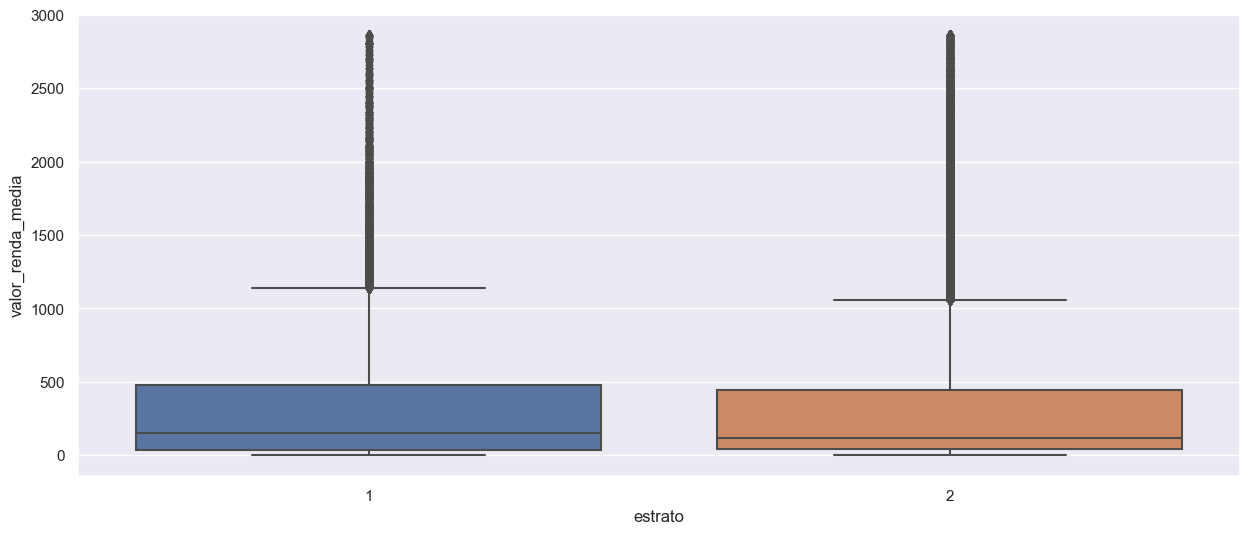

In [308]:
data = pd.concat([df_fam['vlr_renda_media_fam'], df_fam['estrato']], axis=1)
data.columns = ['valor_renda_media','estrato']
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='estrato', y='valor_renda_media', data=data)

In [409]:
features_categoricas = df_fam.select_dtypes(include = ["object"]).columns
features_categoricas

Index(['cd_ibge', 'estrato', 'classf', 'id_familia', 'cod_local_domic_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'cod_faixa_renda',
       'nom_faixa_renda', 'ind_grp_espec', 'ind_grp_espec_quil'],
      dtype='object')

In [414]:
# mantendo 
features_categoricas = [ 'estrato', 'classf', 
                        'cod_local_domic_fam',
                        'cod_material_piso_fam', 'cod_material_domic_fam',
                        'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
                        'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
                        'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
                        #'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 
                        'cod_faixa_renda', #'nom_faixa_renda', 
                        'ind_grp_espec']

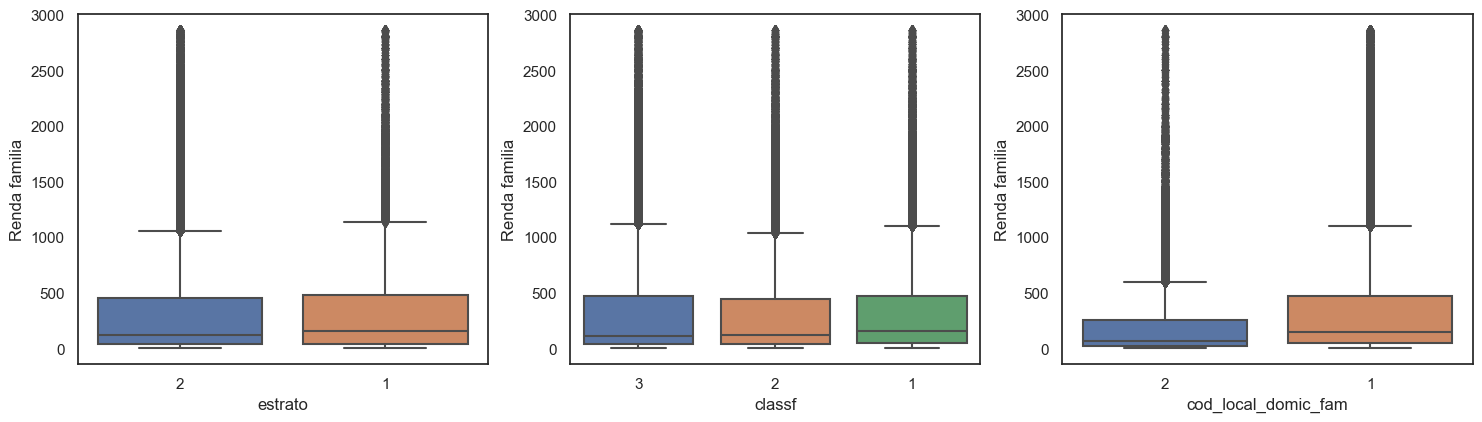

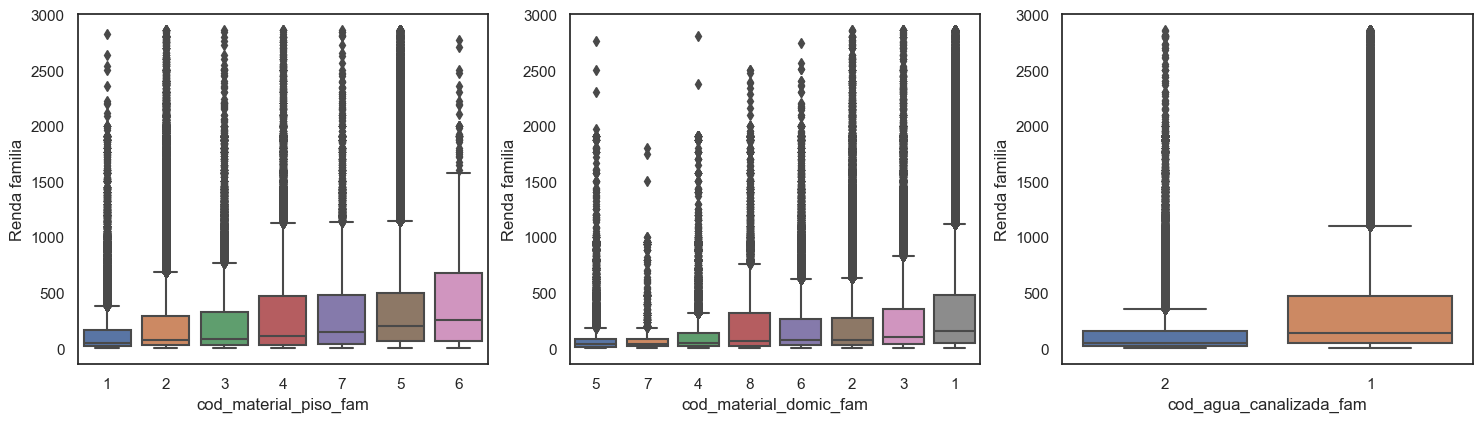

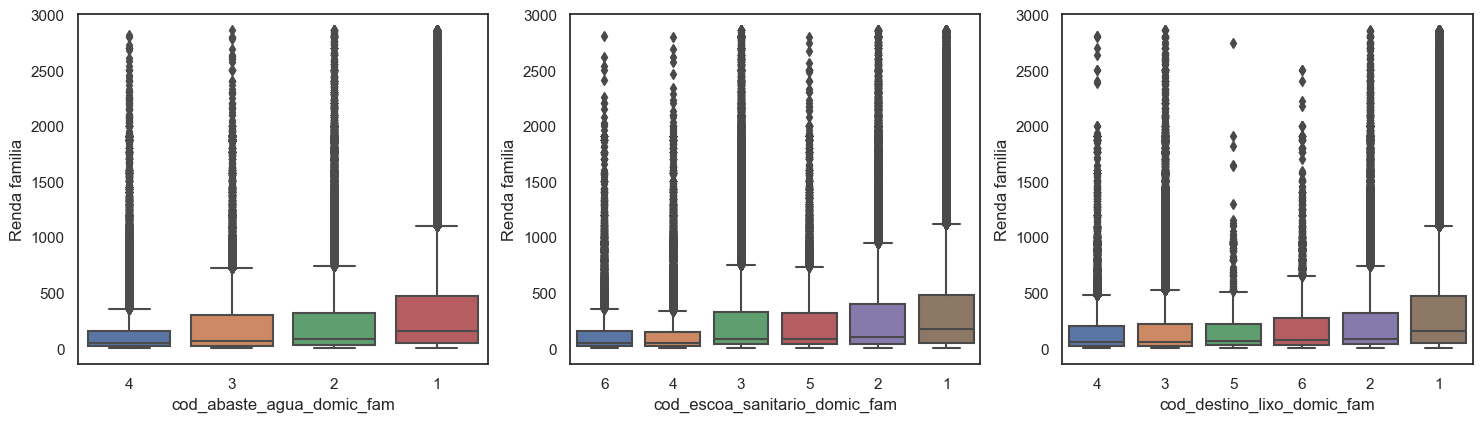

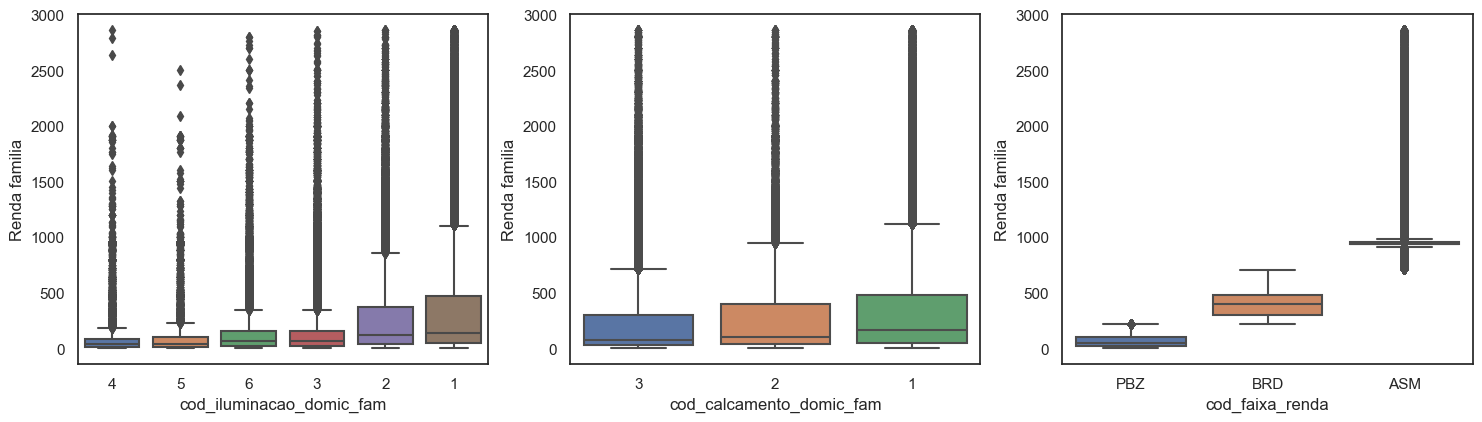

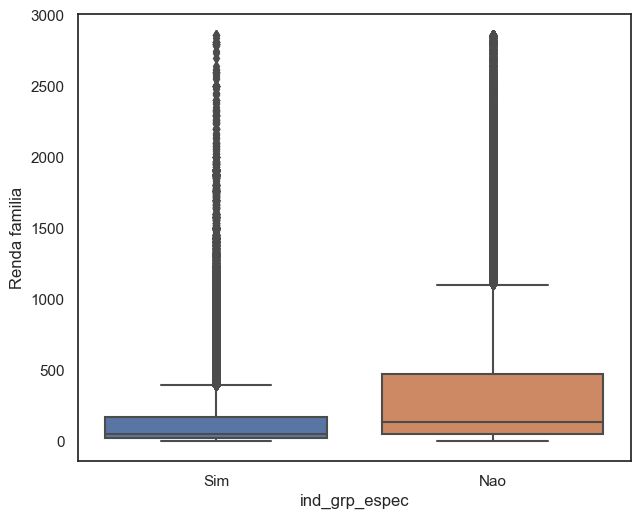

In [415]:
# Criação dos gráficos boxplot
ix = 1
fig = plt.figure(figsize = (18,10))

for c in list(df_fam[features_categoricas]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            my_order = df_fam.groupby(by=c)['vlr_renda_media_fam'].median().sort_values(ascending=False).iloc[::-1].index
            sns.boxplot(data=df_fam, x=c, y='vlr_renda_media_fam', ax=ax2, order=my_order)
            ax2.set(ylabel="Renda familia")
            
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=0)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18,10))
        ix =1
        
plt.tight_layout()

In [24]:
checar_df(df_pess)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852599 entries, 0 to 12852598
Data columns (total 35 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   cd_ibge                           object
 1   estrato                           object
 2   classf                            object
 3   id_familia                        object
 4   id_pessoa                         object
 5   cod_sexo_pessoa                   object
 6   idade                             object
 7   cod_parentesco_rf_pessoa          object
 8   cod_raca_cor_pessoa               object
 9   cod_local_nascimento_pessoa       object
 10  cod_certidao_registrada_pessoa    object
 11  cod_deficiencia_memb              object
 12  cod_sabe_ler_escrever_memb        object
 13  ind_frequenta_escola_memb         object
 14  cod_escola_local_memb             object
 15  cod_curso_frequenta_memb          object
 16  cod_ano_serie_frequenta_m

,Contagem Unicos
cd_ibge,5534
classf,3
cod_afastado_trab_memb,2
cod_agricultura_trab_memb,2
cod_ano_serie_frequenta_memb,10
cod_ano_serie_frequentou_memb,10
cod_certidao_registrada_pessoa,4
cod_concluiu_frequentou_memb,2
cod_curso_frequenta_memb,14
cod_curso_frequentou_pessoa_memb,15


Número de valores nulos:


,Contagem Nulos
cd_ibge,0
classf,0
cod_afastado_trab_memb,7138988
cod_agricultura_trab_memb,10015482
cod_ano_serie_frequenta_memb,9347941
cod_ano_serie_frequentou_memb,6498619
cod_certidao_registrada_pessoa,0
cod_concluiu_frequentou_memb,6498384
cod_curso_frequenta_memb,8473736
cod_curso_frequentou_pessoa_memb,6173568
